In [144]:
#Experiment4
import datetime
import pandas as pd 
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import math

#用在线的方式从QUANDL 获取数据
symbol = 'AAPL.US'
df = web.DataReader(symbol,'quandl','2018-02-02','2018-03-09')
df.to_csv('./apple25.csv')

fsplit = open('./apple25.csv','r')
lines_label = fsplit.readlines()
fsplit.close()
close = list()
#整理数据，得到收盘价
for each in lines_label[1:]:
    tokens = each.split(',')
    close.append(tokens[4])
closed = close[::-1]
dateX = np.arange(1,len(closed)+1)
X = np.array(closed,dtype='float32')

/usr/local/lib/python2.7/dist-packages/urllib3/util/ssl_.py:137: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning


In [13]:
#计算常维D，长度维len(X)-2
def calConsDem(X):
    consdem = list()
    for i in range(2,len(X)+1):
        consdem.append(math.log(X[i-1]/X[i-2])/math.log(float(i-1)/float(i)))
    return consdem
#累加函数:用于累加和变换
def cirSum(X):
    result = list()
    for i in range(0,len(X)):
        result.append(sum(X[0:i+1]))
    return result

In [145]:
#计算一阶，二阶，三阶累加和
S1 = cirSum(X)
S2 = cirSum(S1)
S3 = cirSum(S2)
S4 = cirSum(S3)

In [146]:
#计算各个累加和序列的分形维数D 
D0 = calConsDem(X)
D1 = calConsDem(S1)
D2 = calConsDem(S2)
D3 = calConsDem(S3)

In [17]:
#根据上面算出的D 带入公式计算C
def calConsC(X,D):
    C = list()
    for i in range(1,len(X)):
        C.append(X[i]*math.pow(i,D[i-1]))
    return C

In [97]:
C2 = calConsC(S2,D2)
C2

[483.82000732421875,
 296.2711242774035,
 230.28987958019718,
 195.2478022392082,
 174.26780744793786,
 159.93698805564875,
 150.45905143962193,
 143.9512695262964,
 139.01793707504027,
 135.15910775108262,
 130.9914842889908,
 127.11684087256427,
 124.02899977355486,
 121.1160060379993,
 118.63276579549161,
 116.28421679227985,
 114.41429720954397,
 112.3392785175764,
 110.51184137343907,
 108.7772566988067,
 107.21253172196865,
 105.6944022239697,
 104.41700243445705,
 103.10144489314682,
 101.47751691110135,
 99.94436104787685,
 98.67354939111019,
 98.03889829791895,
 97.42073555251656,
 96.8407193336519,
 96.18049351374266,
 95.65134344269637,
 95.03495886501783,
 93.81152948907787,
 92.29534781815707,
 90.68236503259847,
 89.45590845107589,
 88.2238516587491,
 86.6827375116715,
 85.13161314444268,
 83.68483785159466,
 82.28699121723405,
 81.12837602086995,
 80.13722282305746,
 79.44900368674816,
 78.99974114430017,
 78.43381553786261,
 77.98845560204212,
 77.59374061846866,
 77.00

S1

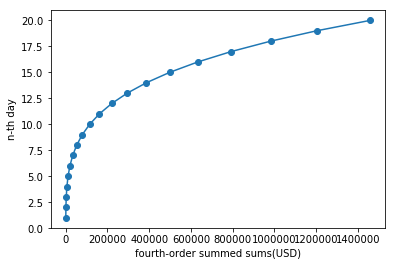

In [39]:
#观察累加和序列的类指数性质
time = range(1,21)
plt.scatter(S4,time,marker='o')
plt.plot(S4,time)
plt.xlabel('fourth-order summed sums(USD)')
plt.ylabel('n-th day')
plt.show()

In [28]:
#预测函数
def fR(R,D,C):
    results  = list()
    for i in R:
        results.append(C/math.pow(i,D))
    return results
    

In [120]:
S2R = fR([127,128,129,130,131],D2[-2],C2[-2])

In [74]:
#累加和变换的逆变换
def cirMinus(S2R,S1R):
    temp = [0,0,0,0,0]
    temp[4]=S2R[4]-S2R[3]
    temp[3]=S2R[3]-S2R[2]
    temp[2]=S2R[2]-S2R[1]
    temp[1]=S2R[1]-S2R[0]
    temp[0]=S2R[0]-S1R
    return temp

In [125]:
S1R = cirMinus(S2R,S2[126])

In [126]:
XR = cirMinus(S1R,S1[126])

In [86]:
symbol = 'AAPL.US'
df = web.DataReader(symbol,'quandl','2018-03-08','2018-03-15')

/usr/local/lib/python2.7/dist-packages/urllib3/util/ssl_.py:137: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecurePlatformWarning


In [87]:
df.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-15,178.50,180.24,178.0701,178.65,22584565.0,0.0,1.0,178.50,180.24,178.0701,178.65,22584565.0
2018-03-14,180.32,180.52,177.8100,178.44,29075469.0,0.0,1.0,180.32,180.52,177.8100,178.44,29075469.0
2018-03-13,182.59,183.50,179.2400,179.97,31168404.0,0.0,1.0,182.59,183.50,179.2400,179.97,31168404.0
2018-03-12,180.29,182.39,180.2100,181.72,32055405.0,0.0,1.0,180.29,182.39,180.2100,181.72,32055405.0
2018-03-09,177.96,180.00,177.3900,179.98,31385134.0,0.0,1.0,177.96,180.00,177.3900,179.98,31385134.0


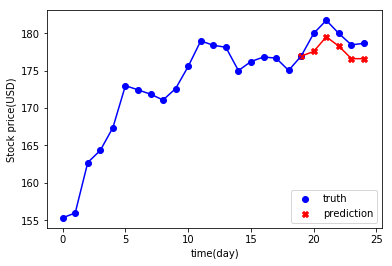

In [130]:
X_pred=[176.94,177.56,179.52,178.27,176.60,176.59]
plt.scatter(range(0,25),X,marker='o',color='b',label='truth')
plt.scatter(range(19,25),X_pred,marker='X',color='r',label='prediction')
plt.plot(range(0,25),X,color='b')
plt.plot(range(19,25),X_pred,color='r')
plt.legend(loc='lower right')
plt.xlabel('time(day)')
plt.ylabel('Stock price(USD)')
plt.show()

In [151]:
len(D2)

24